In [1]:
# Might need to install some extra dependencies first to run this:
# !pip install --user vega seaborn
# !jupyter nbextension install --user --py vega3
# !jupyter nbextension enable vega3 --user --py

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fast_plotter.utils as fst
import fast_plotter.plotting as fst_plt

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 6, 6
rcParams['figure.dpi'] = 150

## Load in the data

In [4]:
!column -s, -t "example_outputs/tbl_dataset.nMuons.nIsoMuons--weighted.csv" |head

dataset     nMuons  nIsoMuons  n         weighted:sumw           weighted:sumw2
data        0       0          227265.0                          
data        1       0          17795.0                           
data        1       1          205616.0                          
data        2       0          107.0                             
data        2       1          2393.0                            
data        2       2          16207.0                           
data        3       3          1.0                               
dy          0       0          2181.0    787.2786254882812       553.8453979492188
dy          1       0          2472.0    910.0523681640625       678.6613159179688


In [5]:
muons = fst.read_binned_df("example_outputs/tbl_dataset.nMuons.nIsoMuons--weighted.csv")
muons.fillna(method="ffill", axis="columns", inplace=True)
muons.head(10)

n  weighted:sumw  weighted:sumw2
dataset nMuons nIsoMuons                                         
data    0      0          227265.0  227265.000000   227265.000000
        1      0           17795.0   17795.000000    17795.000000
               1          205616.0  205616.000000   205616.000000
        2      0             107.0     107.000000      107.000000
               1            2393.0    2393.000000     2393.000000
               2           16207.0   16207.000000    16207.000000
        3      3               1.0       1.000000        1.000000
dy      0      0            2181.0     787.278625      553.845398
        1      0            2472.0     910.052368      678.661316
               1           29027.0   13163.787109     9294.289062

## Project 2D to 1D vs datasets

In [6]:
muons_1d = muons.groupby(level=("dataset", "nMuons")).sum()
muons_1d.head(8)

n  weighted:sumw  weighted:sumw2
dataset nMuons                                         
data    0       227265.0  227265.000000   227265.000000
        1       223411.0  223411.000000   223411.000000
        2        18707.0   18707.000000    18707.000000
        3            1.0       1.000000        1.000000
dy      0         2181.0     787.278625      553.845398
        1        31499.0   14073.839478     9972.950378
        2        44048.0   19253.873589    10659.372234
        3            1.0       0.518289        0.268624

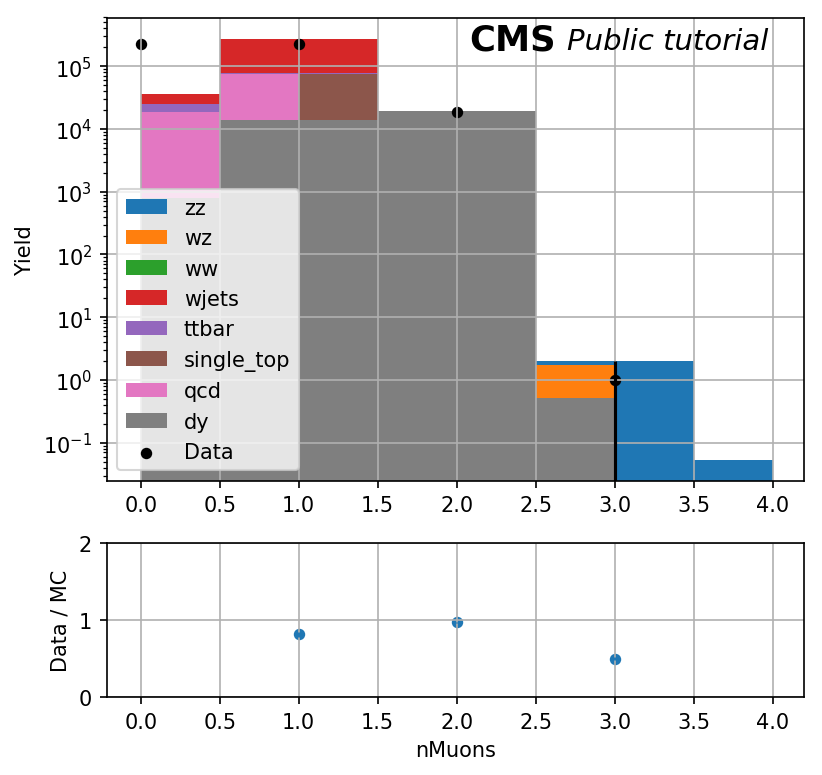

In [12]:
main, ratio = fst_plt.plot_1d_many(muons_1d, prefix="weighted")

main.set_yscale("log")
main.set_ylabel("Yield")
main.annotate("CMS", (0.52, 0.93), xycoords="axes fraction",fontsize=17, fontweight="bold")
main.annotate("Public tutorial", (0.66, 0.932), xycoords="axes fraction",fontsize=14, fontstyle="italic")
main.legend(loc="lower left")

## Plot the Dimuon data
Uses an "interval index"

In [8]:
dimuon = fst.read_binned_df("example_outputs/tbl_dataset.dimu_mass--weighted.csv")
dimuon.head()

n  weighted:sumw  weighted:sumw2
dataset dimu_mass                                         
data    (-inf, 60.0]  993.0            NaN             NaN
        (60.0, 61.0]   38.0            NaN             NaN
        (61.0, 62.0]   25.0            NaN             NaN
        (62.0, 63.0]   22.0            NaN             NaN
        (63.0, 64.0]   28.0            NaN             NaN

(0.7, 10000.0)

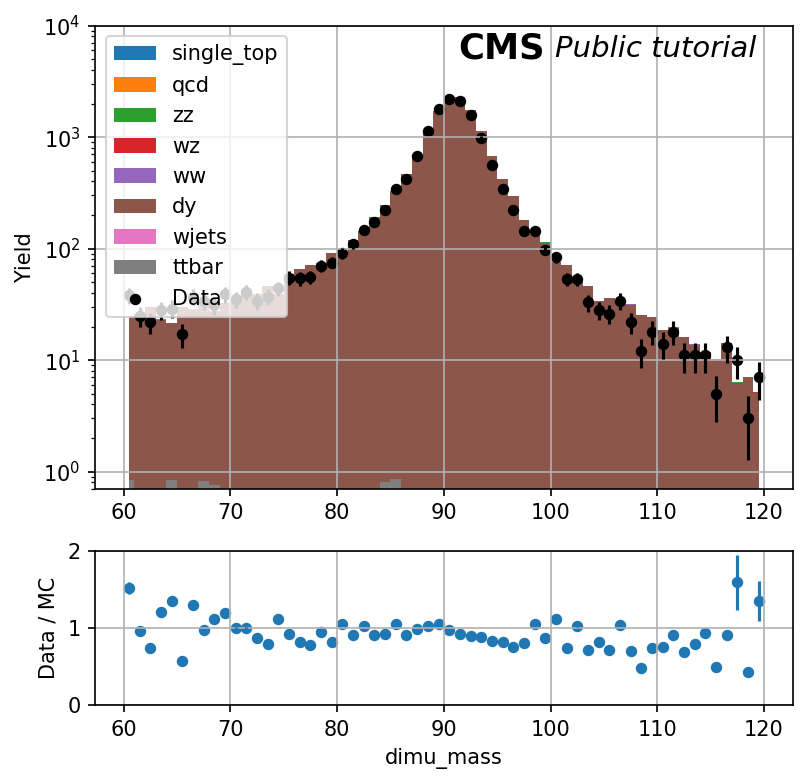

In [13]:
# Fx the dataset ordering to match the original 
order = ["data", "ttbar", "wjets", "dy", "ww", "wz", "zz", "qcd", "single_top"]
dimuon = dimuon.reindex(order, axis=0, level=0).fillna(method="ffill", axis="columns")

main, ratio = fst_plt.plot_1d_many(dimuon, prefix="weighted")

main.set_yscale("log")
main.set_ylabel("Yield")
main.annotate("CMS", (0.52, 0.93), xycoords="axes fraction",fontsize=17, fontweight="bold")
main.annotate("Public tutorial", (0.66, 0.932), xycoords="axes fraction",fontsize=14, fontstyle="italic")
main.legend(loc="upper left")
main.set_ylim([0.7, 1e4])